## Logistic Regression

In [1]:
from __future__ import print_function

### Iris Dataset

In [2]:
# read in the iris data
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
np.random.seed(0)

iris = load_iris()

# create X (features) and y (response)
X = pd.DataFrame(iris.data,
                 columns = iris.feature_names)

y = iris.target
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [5]:
# class names
y = iris.target
y[:5]

array([0, 0, 0, 0, 0])

In [6]:
iris.target_names[iris.target[:5]]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], 
      dtype='<U10')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=None)

### One versus rest (OVR) multiclass classification

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=100000)
logreg.fit(X_train,y_train)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [9]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test = logreg.score(X_test, y_test)
print("train_score=%.3f\ntest_score =%.3f\n" % (accuracy_train, accuracy_test))

train_score=1.000
test_score =0.967



### Some attributes of the LogisticRegression class

In [10]:
np.set_printoptions(precision=3)

print('n_iter:\t\t', logreg.n_iter_)
print('classes:\t', logreg.classes_)
print('intercepts:\t', logreg.intercept_)
print('coefs:\n', logreg.coef_)

n_iter:		 [16]
classes:	 [0 1 2]
intercepts:	 [   0.98    11.246 -120.001]
coefs:
 [[  1.728   4.741  -8.108  -4.031]
 [ -1.009  -3.236   1.964  -3.38 ]
 [-26.644 -48.981  52.938  97.855]]


In [11]:
# predict classes for some cases
logreg.predict(X_test[:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [12]:
# decision function = log-odds =  values of X dot Beta for each class.
logreg.decision_function(X_test[:10])

array([[ -2.674e+01,  -1.759e+00,   9.315e+01],
       [ -1.468e+01,   2.552e+00,  -7.801e+01],
       [  1.824e+01,  -5.818e+00,  -3.786e+02],
       [ -3.099e+01,   7.897e-01,   5.310e+01],
       [  1.277e+01,  -2.528e+00,  -3.208e+02],
       [ -3.121e+01,  -2.452e+00,   1.128e+02],
       [  1.447e+01,  -3.583e+00,  -3.265e+02],
       [ -1.689e+01,  -1.381e+00,  -5.476e+01],
       [ -1.855e+01,   2.327e-02,  -4.723e+01],
       [ -1.287e+01,  -5.041e-01,  -8.071e+01]])

In [13]:
logreg.predict_proba(X_test[:10])

array([[  2.121e-012,   1.281e-001,   8.719e-001],
       [  4.541e-007,   1.000e+000,   1.417e-034],
       [  9.970e-001,   2.957e-003,   3.847e-165],
       [  2.068e-014,   4.075e-001,   5.925e-001],
       [  9.312e-001,   6.881e-002,   4.547e-140],
       [  2.593e-014,   7.349e-002,   9.265e-001],
       [  9.737e-001,   2.633e-002,   1.591e-142],
       [  2.293e-007,   1.000e+000,   8.193e-024],
       [  1.736e-008,   1.000e+000,   6.110e-021],
       [  6.826e-006,   1.000e+000,   2.354e-035]])

In [14]:
logreg.predict_log_proba(X_test[:10])

array([[ -2.688e+01,  -2.055e+00,  -1.371e-01],
       [ -1.460e+01,  -4.541e-07,  -7.794e+01],
       [ -2.961e-03,  -5.824e+00,  -3.786e+02],
       [ -3.151e+01,  -8.977e-01,  -5.234e-01],
       [ -7.129e-02,  -2.676e+00,  -3.208e+02],
       [ -3.128e+01,  -2.611e+00,  -7.633e-02],
       [ -2.669e-02,  -3.637e+00,  -3.265e+02],
       [ -1.529e+01,  -2.293e-07,  -5.316e+01],
       [ -1.787e+01,  -1.736e-08,  -4.654e+01],
       [ -1.189e+01,  -6.826e-06,  -7.973e+01]])

### Plot Decision Boundary

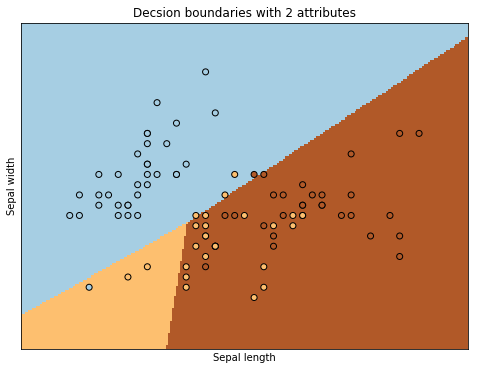

In [15]:
# Plot the decision boundary in 2-d 
# For that, we will assign a color to each point in the 
# mesh [x_min, x_max] x [y_min, y_max].

import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

def plot_decision_boundary (X,y,model):
    Q = X.values
    h = .02  # meshsize
    x_min, x_max = Q[:, 0].min() - .5, Q[:, 0].max() + .5
    y_min, y_max = Q[:, 1].min() - .5, Q[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    model.fit(X.iloc[:,:2],y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(Q[:, 0], Q[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title('Decsion boundaries with 2 attributes')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
plot_decision_boundary (X_train,y_train,LogisticRegression());

### LogisticRegressionCV

In [16]:
from sklearn.linear_model import LogisticRegressionCV
logregcv = LogisticRegressionCV(Cs=[0.0001, 0.01, 1.0, 100, 10000], cv=4, random_state=1)
logregcv.fit(X_train,y_train)

LogisticRegressionCV(Cs=[0.0001, 0.01, 1.0, 100, 10000], class_weight=None,
           cv=4, dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=1, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [17]:
acc_train_cv = logregcv.score(X_train, y_train)
acc_test_cv = logregcv.score(X_test, y_test)
print("train_score=%.3f\ntest_score =%.3f\n" % (acc_train_cv, acc_test_cv))

train_score=0.911
test_score =0.850



In [18]:
print('max_iter:\t', logregcv.n_iter_.flatten().max())
print('classes:\t', logregcv.classes_)
print('C:\t\t', logregcv.C_)
print('intercept:\t', logreg.intercept_)
print('coef:\n', logreg.coef_)

max_iter:	 43
classes:	 [0 1 2]
C:		 [  1.000e-02   1.000e+02   1.000e+00]
intercept:	 [   0.98    11.246 -120.001]
coef:
 [[  1.728   4.741  -8.108  -4.031]
 [ -1.009  -3.236   1.964  -3.38 ]
 [-26.644 -48.981  52.938  97.855]]


In [19]:
logregcv.scores_

{0: array([[ 0.625,  1.   ,  1.   ,  1.   ,  1.   ],
        [ 0.609,  1.   ,  1.   ,  1.   ,  1.   ],
        [ 0.636,  1.   ,  1.   ,  1.   ,  1.   ],
        [ 0.619,  1.   ,  1.   ,  1.   ,  1.   ]]),
 1: array([[ 0.708,  0.708,  0.75 ,  0.708,  0.708],
        [ 0.696,  0.696,  0.783,  0.826,  0.826],
        [ 0.682,  0.682,  0.591,  0.727,  0.727],
        [ 0.714,  0.714,  0.81 ,  0.762,  0.762]]),
 2: array([[ 0.667,  0.792,  1.   ,  1.   ,  1.   ],
        [ 0.696,  0.696,  1.   ,  1.   ,  0.957],
        [ 0.682,  0.955,  0.909,  0.955,  0.909],
        [ 0.667,  0.714,  1.   ,  0.952,  0.952]])}

In [20]:
m = logregcv.scores_[1].reshape(4,5).sum(axis=0).argmax()
C = logregcv.Cs_[m]
print(m, C)

3 100.0


0.73333333333333328

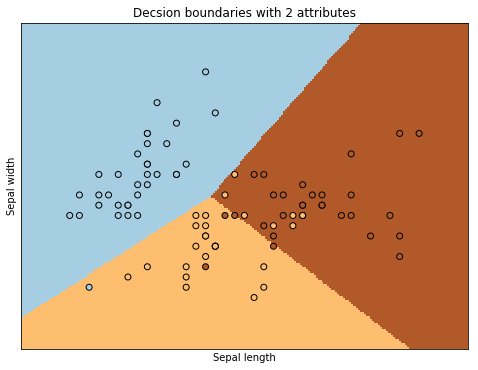

In [21]:
lr = LogisticRegression(C=C)
plot_decision_boundary(X_train.iloc[:,0:2],y_train,lr)
lr.score(X_test.iloc[:,0:2], y_test)

Other methods:
- class_weights to balance classes

### Interpret coeffs

- $exp(\beta_0) \equiv$  odds of heads when $ x_i = 0 \ \forall{i}$
- $exp(\beta_1) \equiv$  multiplicative increase in odds of heads for unit increas in $x_1$
- $odds \ o = p/(1-p)$
- $p = o/(1 + o)$